In [24]:
# prompt: read my stats.csv file and provide a statistical summery
library(readr)
stats <- read_csv("stats.csv")
summary(stats)


Rows: 1406 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): last_name, first_name
dbl (29): player_id, year, player_age, ab, pa, hit, single, double, triple, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 last_name, first_name   player_id           year        player_age   
 Length:1406           Min.   :116338   Min.   :2015   Min.   :20.00  
 Class :character      1st Qu.:514917   1st Qu.:2017   1st Qu.:26.00  
 Mode  :character      Median :592206   Median :2019   Median :28.00  
                       Mean   :566834   Mean   :2019   Mean   :28.33  
                       3rd Qu.:641820   3rd Qu.:2022   3rd Qu.:31.00  
                       Max.   :808982   Max.   :2024   Max.   :41.00  
       ab              pa             hit            single     
 Min.   :132.0   Min.   :152.0   Min.   : 24.0   Min.   : 12.0  
 1st Qu.:457.0   1st Qu.:511.0   1st Qu.:107.2   1st Qu.: 60.0  
 Median :514.0   Median :576.5   Median :135.0   Median : 83.0  
 Mean   :462.5   Mean   :518.7   Mean   :123.6   Mean   : 77.8  
 3rd Qu.:569.0   3rd Qu.:640.0   3rd Qu.:156.0   3rd Qu.:100.0  
 Max.   :681.0   Max.   :753.0   Max.   :217.0   Max.   :170.0  
     double          triple          home_run   

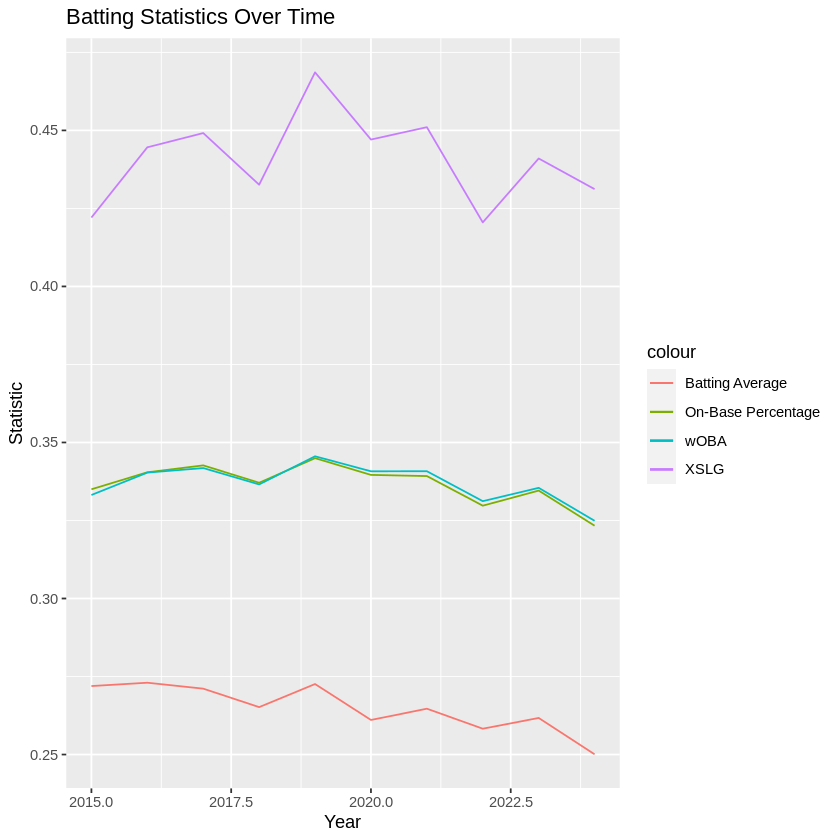

In [ ]:
# prompt: group batting_avg, on_base_percent, xslg, and woba by year  and plot them over time from year 2000

library(dplyr)
library(ggplot2)

stats_by_year <- stats %>%
  filter(year >= 2000) %>%
  group_by(year) %>%
  summarise(
    batting_avg = mean(batting_avg, na.rm = TRUE),
    on_base_percent = mean(on_base_percent, na.rm = TRUE),
    xslg = mean(xslg, na.rm = TRUE),
    woba = mean(woba, na.rm = TRUE)
  )

ggplot(stats_by_year, aes(x = year)) +
  geom_line(aes(y = batting_avg, color = "Batting Average")) +
  geom_line(aes(y = on_base_percent, color = "On-Base Percentage")) +
  geom_line(aes(y = xslg, color = "XSLG")) +
  geom_line(aes(y = woba, color = "wOBA")) +
  labs(title = "Batting Statistics Over Time",
       x = "Year",
       y = "Statistic")


`geom_smooth()` using formula = 'y ~ x'


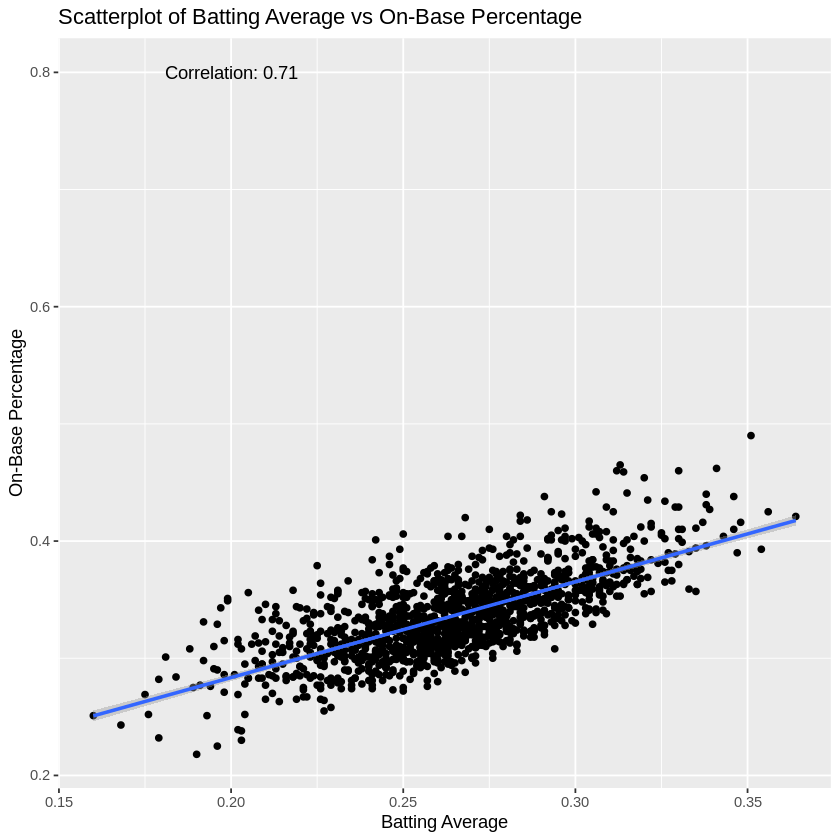

In [21]:
# prompt: perform a meaninful analysis on some of the data and create a relevant chart using ggplot

# Calculate the correlation between batting average and on-base percentage
correlation <- cor(stats$batting_avg, stats$on_base_percent)

# Create a scatterplot of batting average vs. on-base percentage
ggplot(stats, aes(x = batting_avg, y = on_base_percent)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Batting Average vs. On-Base Percentage",
       x = "Batting Average",
       y = "On-Base Percentage") +
  annotate("text", x = 0.25, y = 0.8, label = paste("Correlation:", round(correlation, 2)))


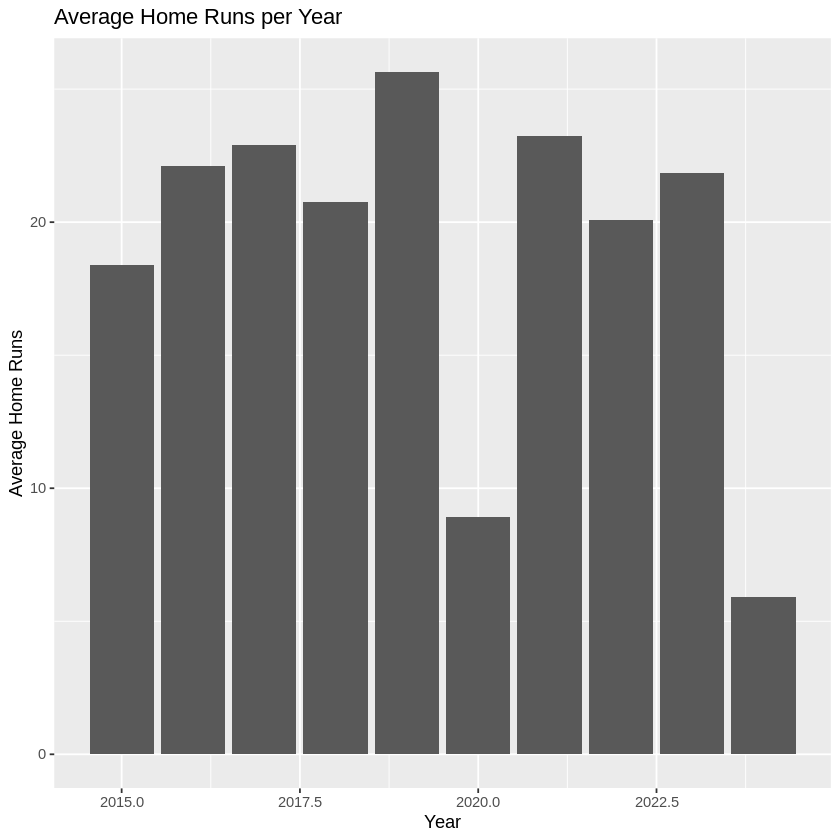

In [ ]:
# prompt: perform a meaninful analysis on some of the data and create a relevant chart using ggplot

# Calculate the average home runs per year
hr_by_year <- stats %>%
  filter(year >= 2000) %>%
  group_by(year) %>%
  summarise(
    avg_hr = mean(home_run, na.rm = TRUE)
  )

# Create a bar chart of average home runs per year
ggplot(hr_by_year, aes(x = year, y = avg_hr)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Home Runs per Year",
       x = "Year",
       y = "Average Home Runs")


`geom_smooth()` using formula = 'y ~ x'


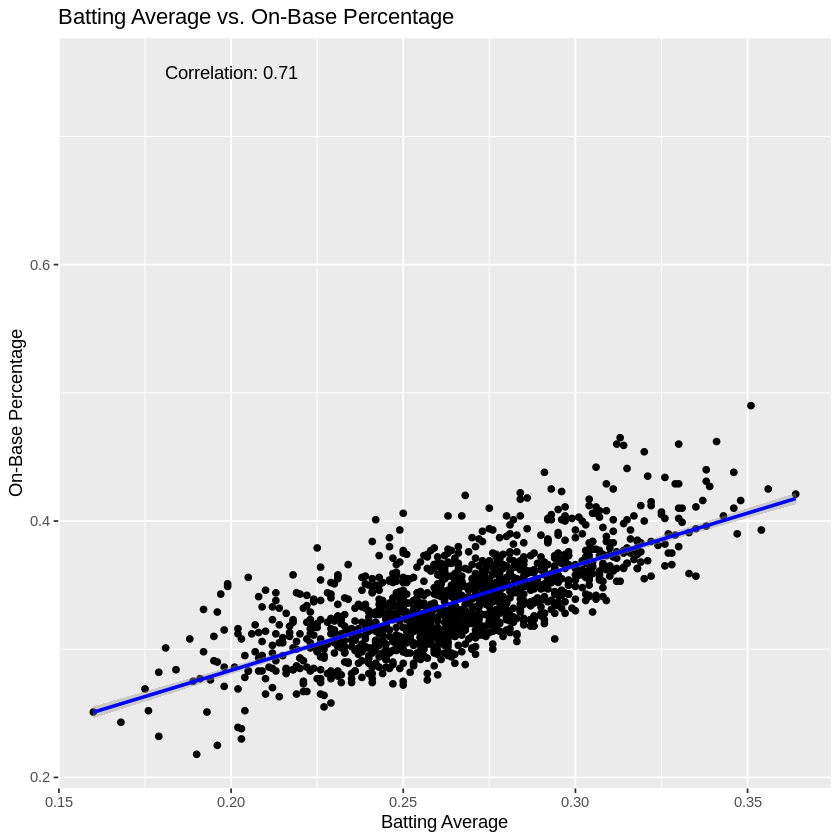

In [22]:
# prompt: perform a meaninful analysis on some of the data and create a relevant chart using ggplot

# Calculate the correlation between batting average and on-base percentage
correlation <- cor(stats$batting_avg, stats$on_base_percent)

# Create a scatterplot with a regression line
ggplot(stats, aes(x = batting_avg, y = on_base_percent)) +
  geom_point() +
  geom_smooth(method = "lm", color = "blue") +
  labs(title = "Batting Average vs. On-Base Percentage",
       x = "Batting Average",
       y = "On-Base Percentage") +
  annotate("text", x = 0.2, y = 0.75, label = paste("Correlation:", round(correlation, 2)))
